# Gaussian RBF Kernel

Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features

* kernel trick does its SVM magic: it makes it possible to obtain a similar result as if you had added many similarity features, without actually having to add them


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline

In [15]:
X, y = make_moons()
grbf_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', gamma=0.1, C=0.001))
])
grbf_svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=0.001, gamma=0.1))])

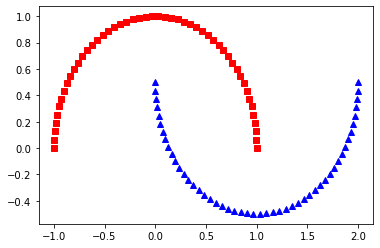

In [6]:
import matplotlib.pyplot as plt
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'rs')
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'b^')

In [16]:
y_pred = grbf_svc.predict(X)

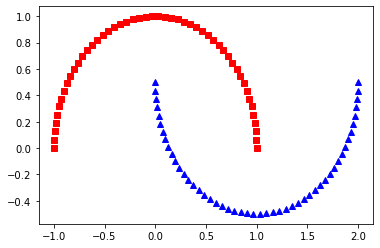

In [8]:
plt.plot(X[:,0][y_pred==0], X[:, 1][y_pred==0], 'rs')
plt.plot(X[:,0][y_pred==1], X[:, 1][y_pred==1], 'b^')

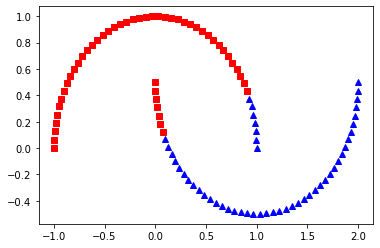

In [17]:
plt.plot(X[:,0][y_pred==0], X[:, 1][y_pred==0], 'rs')
plt.plot(X[:,0][y_pred==1], X[:, 1][y_pred==1], 'b^')

In [20]:
sp_vector = grbf_svc['svc'].support_vectors_

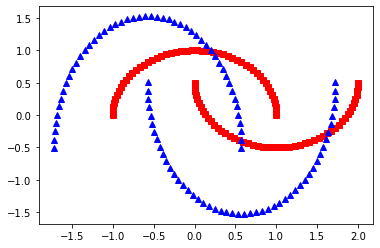

In [14]:
plt.plot(X[:,0], X[:, 1],'rs')
plt.plot(sp_vector[:,0],sp_vector[:, 1], 'b^')

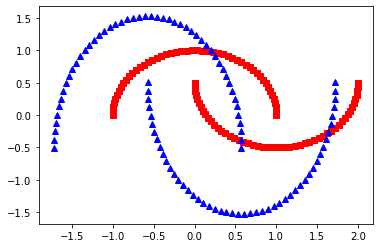

In [21]:
plt.plot(X[:,0], X[:, 1],'rs')
plt.plot(sp_vector[:,0],sp_vector[:, 1], 'b^')

<img src='img4.png' witdh=600 height=900/>

The other plots show models trained with different values of hyperparameters gamma (γ) and C

Increasing gamma makes the bell-shape curve narrower. 
and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances.


Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So γ acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is under‐fitting, you should increase it (similar to the C hyperparameter).



Other kernels exist but are used much more rarely. For example, some kernels are
specialized for specific data structures. String kernels are sometimes used when classi‐
fying text documents or DNA sequences (e.g., using the string subsequence kernel or
kernels based on the Levenshtein distance).


With so many kernels to choose from, how can you decide which
one to use? As a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
try the Gaussian RBF kernel as well; it works well in most cases.
Then if you have spare time and computing power, you can also
experiment with a few other kernels using cross-validation and grid
search, especially if there are kernels specialized for your training
set’s data structure